In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import welly
import os
env = %env
from welly import Well
import lasio

In [2]:
import pandas as pd
picks_dic = pd.read_csv('./SPE_006_originalData/OilSandsDB/PICKS_DIC.TXT',delimiter='\t')
picks = pd.read_csv('./SPE_006_originalData/OilSandsDB/PICKS.TXT',delimiter='\t')
wells = pd.read_csv('./SPE_006_originalData/OilSandsDB/WELLS.TXT',delimiter='\t')
picks_new=picks[picks['HorID']==13000]
df_new=pd.merge(wells, picks_new, on='SitID')
df_new.head()

,SitID,UWI (AGS),UWI,HorID,Pick,Quality
0,102496,0674010812000,00/12-08-067-01W4/0,13000,475,3
1,102497,0674020807000,00/07-08-067-02W4/0,13000,515,3
2,102498,0674021109000,00/09-11-067-02W4/0,13000,480,3
3,102500,0674022910000,00/10-29-067-02W4/0,13000,549,3
4,102501,0674023406000,00/06-34-067-02W4/0,13000,529,2


In [3]:
import glob
count=0
data_df=[]
for file in glob.glob('./SPE_006_originalData/OilSandsDB/Logs/*.LAS'):
    if count >101:
        break
    count+=1  
    l_df = lasio.read(file).df()
    str_uwi= file[-23:-4].replace("-", "/",1)[:17]+file[-6:-4].replace("-", "/",1)
    l_df = l_df.reset_index()
    l_df['UWI'] = str_uwi
    l_df['SitID']=df_new[df_new['UWI']==str_uwi]['SitID'].iloc[0]
    l_df['UWI (AGS)']=df_new[df_new['UWI']==str_uwi]['UWI (AGS)'].iloc[0]
    l_df['Pick']=df_new[df_new['UWI']==str_uwi]['Pick'].iloc[0] 
    l_df['HorID']=df_new[df_new['UWI']==str_uwi]['HorID'].iloc[0]
    l_df['Quality']=df_new[df_new['UWI']==str_uwi]['Quality'].iloc[0]

    print(l_df.Pick.unique()[0])  
    try:
        float(l_df.Pick.unique()[0])
        l_df.Pick = l_df.Pick.astype(float)
        l_df.DEPT = l_df.DEPT.astype(float)
        l_df['new_pick']=l_df['Pick']-l_df['DEPT']
        l_df['new_pick2']=l_df['new_pick'].apply(lambda x: 1 if(x==0) else 0)
        if count == 1:
            data_df=l_df
        if count >= 2:
            data_df=pd.concat([data_df, l_df])      
    except:
        print ('Error picking')
        continue;

607
        
Error picking
243
631
253
411
441
535
429
454
263
602
220.5
435
441
421.5
327.96
        
Error picking
416
        
Error picking
591
456
808.02
        
Error picking
806.5
596
519
568
362.5
        
Error picking
309.5
477
593.5
        
Error picking
372
480
580
368.5
474.5
493
455
450
329
588.87
220.5
        
Error picking
327
475
283
422
471
642
531
        
Error picking
473
596.5
149.96
355.5
323.5
294
425
541
180.5
396.24
465
474
410
231.5
556.5
        
Error picking
        
Error picking
449
636
487
468
365.46
        
Error picking
473.66
416
269
361.9
        
Error picking
282
        
Error picking
436
370.64
274
697
774.19
628.5
283
        
Error picking
        
Error picking
442.5
        
Error picking
728.47
437
336
424.28
        
Error picking
408.43
253


In [4]:
data_df.shape

(72895, 16)

In [10]:
data_df

,CALI,DELT,DEPT,DPHI,GR,HorID,ILD,NPHI,Pick,Quality,RHOB,SitID,UWI,UWI (AGS),new_pick,new_pick2
0,238.379,NaN,390.000,0.199,82.478,13000,2.923,0.457,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,217.000,0
1,238.331,NaN,390.250,0.208,86.413,13000,2.925,0.456,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,216.750,0
2,238.069,NaN,390.500,0.246,90.229,13000,2.917,0.452,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,216.500,0
3,238.752,NaN,390.750,0.266,90.944,13000,2.898,0.475,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,216.250,0
4,239.724,NaN,391.000,0.287,88.866,13000,2.890,0.484,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,216.000,0
5,241.951,NaN,391.250,0.288,82.638,13000,2.844,0.474,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,215.750,0
6,244.478,NaN,391.500,0.241,83.345,13000,2.748,0.461,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,215.500,0
7,247.116,NaN,391.750,0.215,88.403,13000,2.725,0.471,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,215.250,0
8,250.475,NaN,392.000,0.190,91.038,13000,2.748,0.448,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,215.000,0
9,254.764,NaN,392.250,0.219,89.579,13000,2.845,0.478,607.0,1,NaN,142218,00/01-01-073-05W5/0,0735050101000,214.750,0


In [11]:
features = ['CALI','DEPT','DPHI','GR','ILD','NPHI', 'SitID']
label = 'new_pick2'
train_X = data_df[features]
train_y = data_df[label]

In [12]:
from xgboost.sklearn import XGBRegressor
model = XGBRegressor()
model.fit(train_X, train_y)
result= model.predict(train_X)
result

array([ 0.00014991,  0.00014991,  0.00014991, ..., -0.00077826,
       -0.00077826, -0.00082153], dtype=float32)

In [13]:
len(result)

72895

In [14]:
data_df_pred = data_df.copy()
data_df_pred['Pick_pred'] = result

In [15]:
for ids in data_df['SitID'].unique():
    ix = data_df_pred['SitID']==ids
    temp = data_df_pred.loc[ix]
    print(ids, temp[temp['Pick_pred']==temp['Pick_pred'].max()]['DEPT'])

142218 868    607.0
Name: DEPT, dtype: float64
115476 508    249.402
Name: DEPT, dtype: float64
153654 784    631.0
Name: DEPT, dtype: float64
143720 612    253.0
Name: DEPT, dtype: float64
112387 784    411.0
Name: DEPT, dtype: float64
178604 584    416.0
Name: DEPT, dtype: float64
111124 860    535.0
Name: DEPT, dtype: float64
143347 816    429.0
Name: DEPT, dtype: float64
178521 824    486.0
Name: DEPT, dtype: float64
114865 627    283.101
Name: DEPT, dtype: float64
178271 908    602.0
Name: DEPT, dtype: float64
114301 522    220.5
Name: DEPT, dtype: float64
141810 584    416.0
Name: DEPT, dtype: float64
154013 764    416.0
Name: DEPT, dtype: float64
112358 741    425.25
Name: DEPT, dtype: float64
110981 159    198.246
Name: DEPT, dtype: float64
112409 704    396.0
Name: DEPT, dtype: float64
163925 966    611.5
Name: DEPT, dtype: float64
164610 524    416.0
Name: DEPT, dtype: float64
106754 74    695.156
75    695.406
76    695.656
77    695.906
Name: DEPT, dtype: float64
110029 503

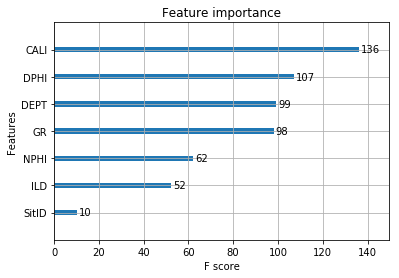

In [17]:
from xgboost import plot_importance
plot_importance(model)